In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('Merged_Netflix_movie&rating.csv')
df.head()


,Show_ID,Movie Title,Director,Country,Release_Year,Rating_class,Duration,Categories,Type,IMDB_Score,IMDB_Votes
0,s1,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90,Documentaries,Movie,7.4,6390.0
1,s7,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",NaN,2021,PG,91,Children & Family Movies,Movie,6.8,3468.0
2,s10,The Starling,Theodore Melfi,United States,2021,PG-13,104,"Comedies, Dramas",Movie,6.3,11733.0
3,s14,Confessions of an Invisible Girl,Bruno Garotti,NaN,2021,TV-PG,91,"Children & Family Movies, Comedies",Movie,5.2,966.0
4,s19,Intrusion,Adam Salky,NaN,2021,TV-14,94,Thrillers,Movie,5.3,15464.0


In [3]:
#check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295 entries, 0 to 2294
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Show_ID       2295 non-null   object 
 1   Movie Title   2295 non-null   object 
 2   Director      2217 non-null   object 
 3   Country       2112 non-null   object 
 4   Release_Year  2295 non-null   int64  
 5   Rating_class  2295 non-null   object 
 6   Duration      2295 non-null   int64  
 7   Categories    2295 non-null   object 
 8   Type          2295 non-null   object 
 9   IMDB_Score    2071 non-null   float64
 10  IMDB_Votes    2066 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 197.4+ KB


In [4]:
#list colume name
df.columns


Index(['Show_ID', 'Movie Title', 'Director', 'Country', 'Release_Year',
       'Rating_class', 'Duration', 'Categories', 'Type', 'IMDB_Score',
       'IMDB_Votes'],
      dtype='object')

In [5]:
df.isnull().sum()

Show_ID           0
Movie Title       0
Director         78
Country         183
Release_Year      0
Rating_class      0
Duration          0
Categories        0
Type              0
IMDB_Score      224
IMDB_Votes      229
dtype: int64

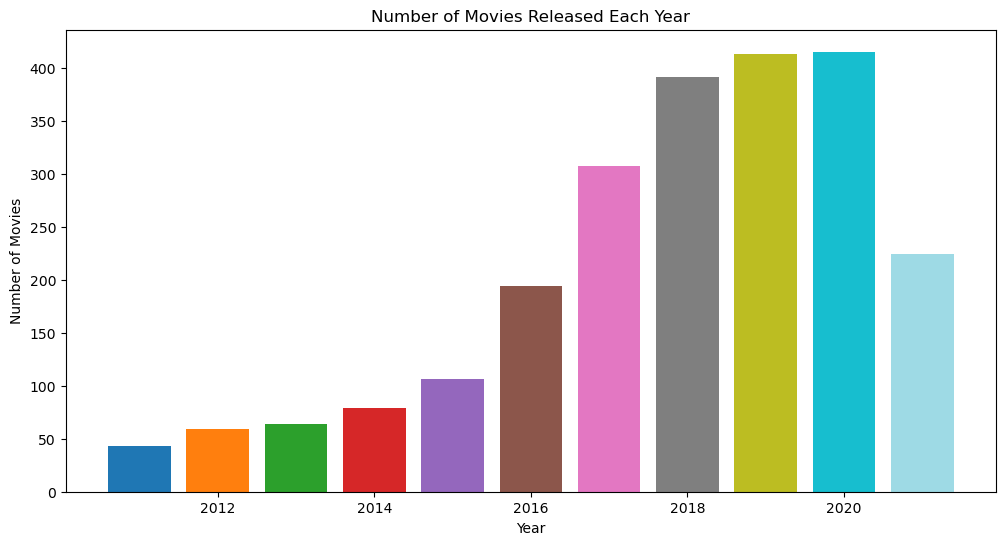

In [8]:
# group the data by release year and count the occurrences
year_counts = df.groupby('Release_Year')['Show_ID'].count()

# create a list of colors for the bars
colors = plt.cm.tab20(np.linspace(0, 1, len(year_counts)))

# plot the data on a bar graph
plt.figure(figsize=(12,6))
plt.bar(year_counts.index, year_counts.values, color=colors)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Each Year')
plt.show()

In [9]:
# filter dataframe to only include movies
movies_df = df[df['Type'] == 'Movie']

# count number of occurrences for each release year
movie_year_counts = movies_df['Release_Year'].value_counts()
movie_year_counts
# print the year with the highest number of movie releases


2020    415
2019    413
2018    391
2017    307
2021    224
2016    194
2015    106
2014     79
2013     64
2012     59
2011     43
Name: Release_Year, dtype: int64

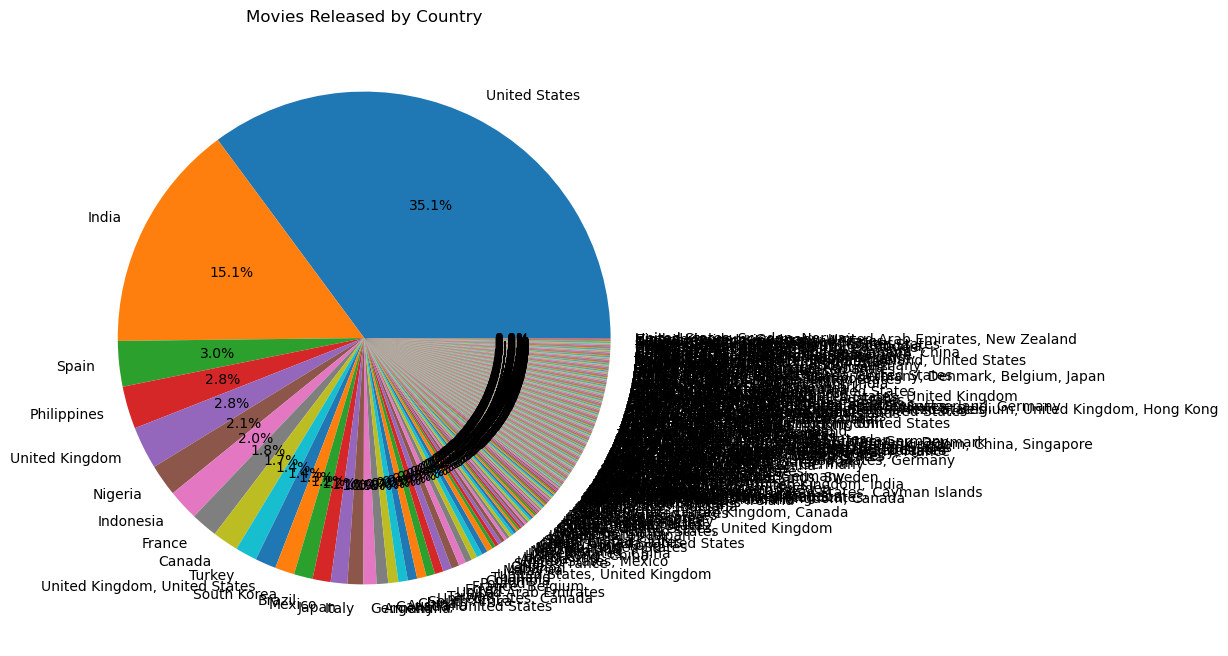

In [10]:
# count the number of movies released by country
country_counts = df[df['Type'] == 'Movie']['Country'].value_counts()

# create a pie chart of the results
plt.figure(figsize=(8, 8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%')
plt.title("Movies Released by Country")
plt.show()

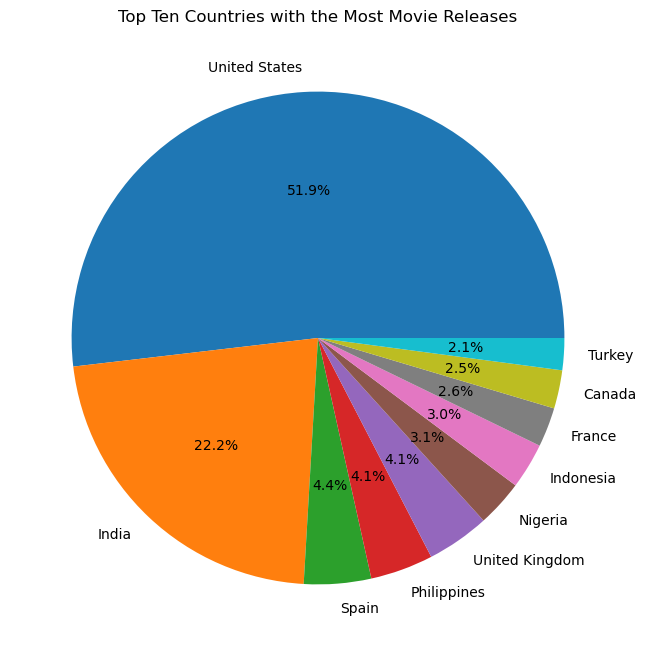

In [11]:
# count the number of movies released in each country
country_counts = df['Country'].value_counts()

# slice the top ten countries
top_countries = country_counts[:10]

# create a pie chart of the top ten countries
plt.figure(figsize=(8,8))
plt.pie(top_countries.values, labels=top_countries.index, autopct='%1.1f%%')
plt.title('Top Ten Countries with the Most Movie Releases')
plt.show()

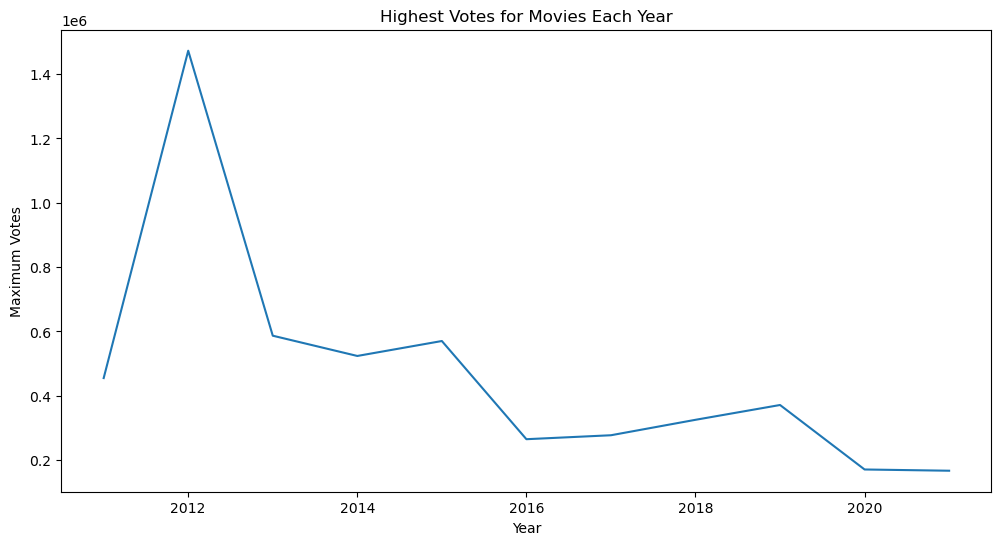

In [12]:
# group the data by release year and find the maximum number of votes for each year
max_votes = df.groupby('Release_Year')['IMDB_Votes'].max()

# plot the data on a line graph
plt.figure(figsize=(12,6))
plt.plot(max_votes.index, max_votes.values)
plt.xlabel('Year')
plt.ylabel('Maximum Votes')
plt.title('Highest Votes for Movies Each Year')
plt.show()

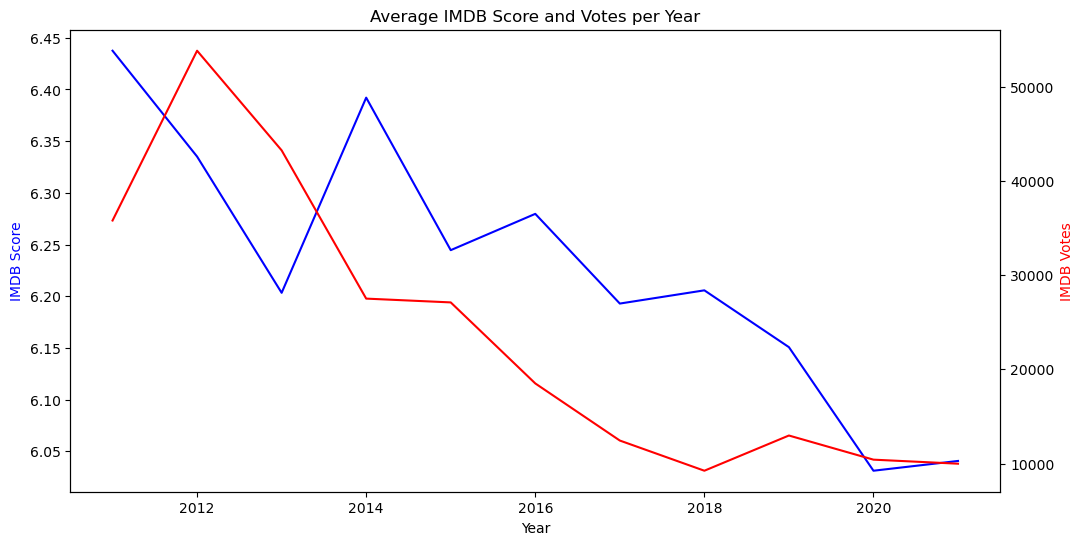

In [13]:
# group the data by release year and calculate the mean of IMDB_Score and IMDB_Votes
year_stats = df.groupby('Release_Year')[['IMDB_Score', 'IMDB_Votes']].mean()

# create a line graph with two y-axes
fig, ax1 = plt.subplots(figsize=(12,6))

# plot the scores on the first y-axis
ax1.plot(year_stats.index, year_stats['IMDB_Score'], color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('IMDB Score', color='blue')

# create a second y-axis
ax2 = ax1.twinx()

# plot the votes on the second y-axis
ax2.plot(year_stats.index, year_stats['IMDB_Votes'], color='red')
ax2.set_ylabel('IMDB Votes', color='red')

# set title
plt.title('Average IMDB Score and Votes per Year')

# show the graph
plt.show()

In [14]:
# group the data by categories and count the occurrences
category_counts = df.groupby('Categories')['Show_ID'].count()

# sort the values in descending order
category_counts = category_counts.sort_values(ascending=False)

# print the top 10 categories with the highest number of occurrences
print(category_counts.head(10))

Categories
Stand-Up Comedy                                     214
Documentaries                                       135
Dramas, International Movies                        130
Comedies, Dramas, International Movies              127
Dramas, Independent Movies, International Movies     99
Dramas, International Movies, Romantic Movies        93
Dramas, International Movies, Thrillers              78
Comedies, International Movies, Romantic Movies      75
Children & Family Movies, Comedies                   62
Comedies, International Movies                       61
Name: Show_ID, dtype: int64


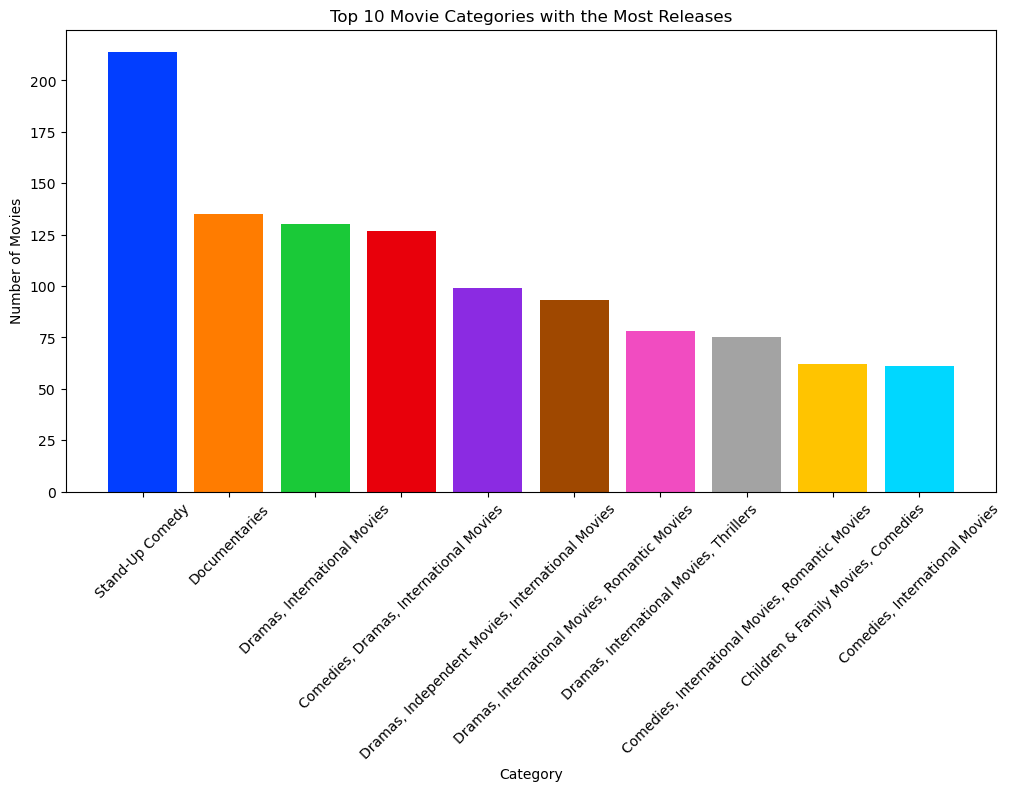

In [21]:
# get the count of each category
category_counts = df['Categories'].value_counts()

# get the top 10 categories
top_categories = category_counts[:10]

# plot the data on a bar graph with different colors for each bar
plt.figure(figsize=(12,6))
plt.bar(top_categories.index, top_categories.values, color=sns.color_palette('bright', len(top_categories)))
plt.xlabel('Category')
plt.ylabel('Number of Movies')
plt.title('Top 10 Movie Categories with the Most Releases')
plt.xticks(rotation=45)
plt.show()

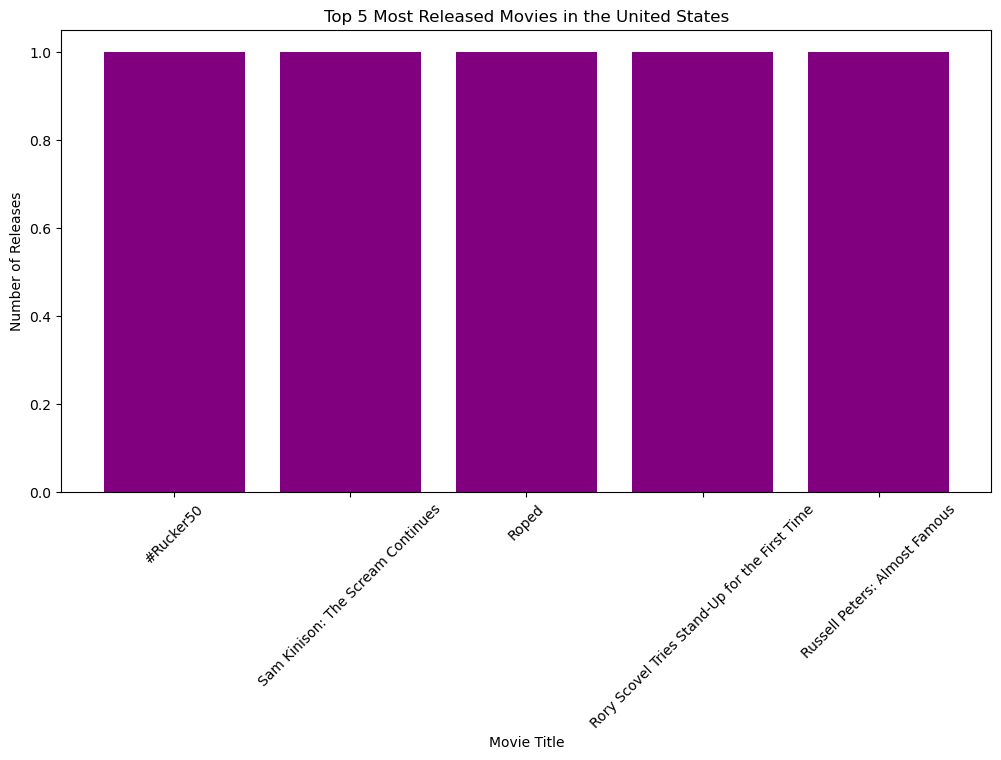

In [29]:
# filter the data to include only movies released in the United States
us_movies = df[df['Country'] == 'United States']

# group the data by title and count the occurrences
movie_counts = us_movies.groupby('Movie Title')['Show_ID'].count()

# sort the data in descending order and select the top 5
top_movies = movie_counts.sort_values(ascending=False)[:5]

# plot the data on a bar graph
plt.figure(figsize=(12,6))
plt.bar(top_movies.index, top_movies.values, color='purple')
plt.xlabel('Movie Title')
plt.ylabel('Number of Releases')
plt.title('Top 5 Most Released Movies in the United States')
plt.xticks(rotation=45)
plt.show()

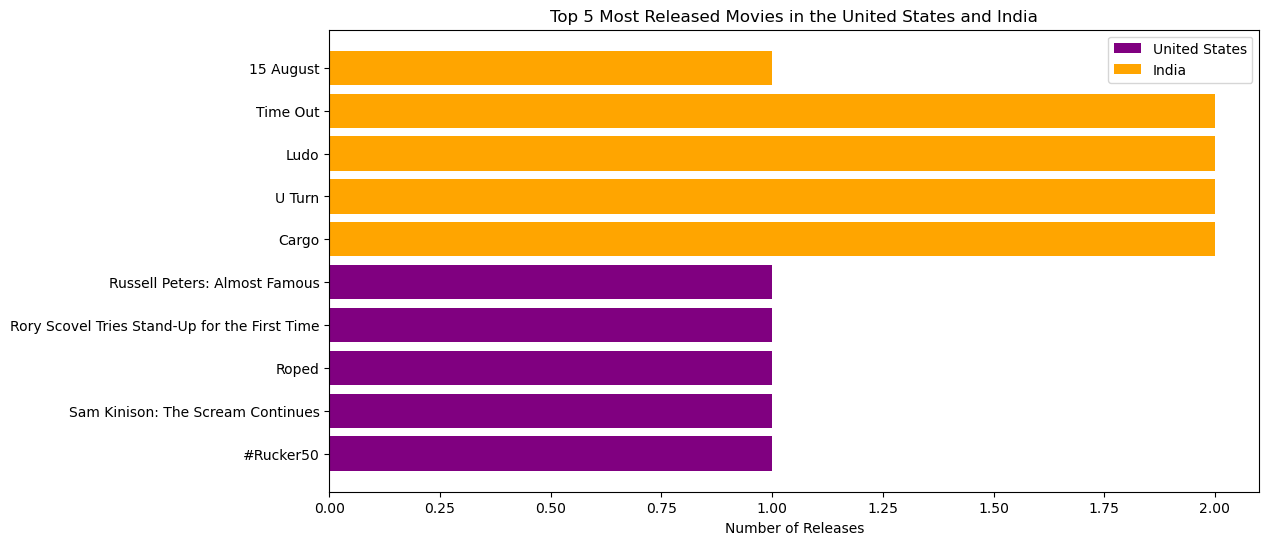

In [30]:
# filter the data to include only movies released in the United States or India
us_india_movies = df[(df['Country'] == 'United States') | (df['Country'] == 'India')]

# group the data by title and count the occurrences
movie_counts = us_india_movies.groupby(['Country', 'Movie Title'])['Show_ID'].count()

# sort the data in descending order and select the top 5 for each country
top_us_movies = movie_counts.loc['United States'].sort_values(ascending=False)[:5]
top_india_movies = movie_counts.loc['India'].sort_values(ascending=False)[:5]

# plot the data on a horizontal bar graph with different colors for each country
plt.figure(figsize=(12,6))
plt.barh(top_us_movies.index, top_us_movies.values, color='purple', label='United States')
plt.barh(top_india_movies.index, top_india_movies.values, color='orange', label='India')
plt.xlabel('Number of Releases')
plt.title('Top 5 Most Released Movies in the United States and India')
plt.legend()
plt.show()